In [1]:
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
import pandas as pd
df = pd.DataFrame(iris.data, columns = iris.feature_names)

df["flower_num"] = iris.target
df["flower_cat"] = df["flower_num"].apply(lambda x: iris.target_names[x]) 

print("Dataset shape = {}".format(df.shape))
df.sample(10)

Dataset shape = (150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_num,flower_cat
78,6.0,2.9,4.5,1.5,1,versicolor
98,5.1,2.5,3.0,1.1,1,versicolor
9,4.9,3.1,1.5,0.1,0,setosa
63,6.1,2.9,4.7,1.4,1,versicolor
34,4.9,3.1,1.5,0.2,0,setosa
117,7.7,3.8,6.7,2.2,2,virginica
6,4.6,3.4,1.4,0.3,0,setosa
90,5.5,2.6,4.4,1.2,1,versicolor
29,4.7,3.2,1.6,0.2,0,setosa
135,7.7,3.0,6.1,2.3,2,virginica


In [7]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
flower_num             int32
flower_cat            object
dtype: object

In [13]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


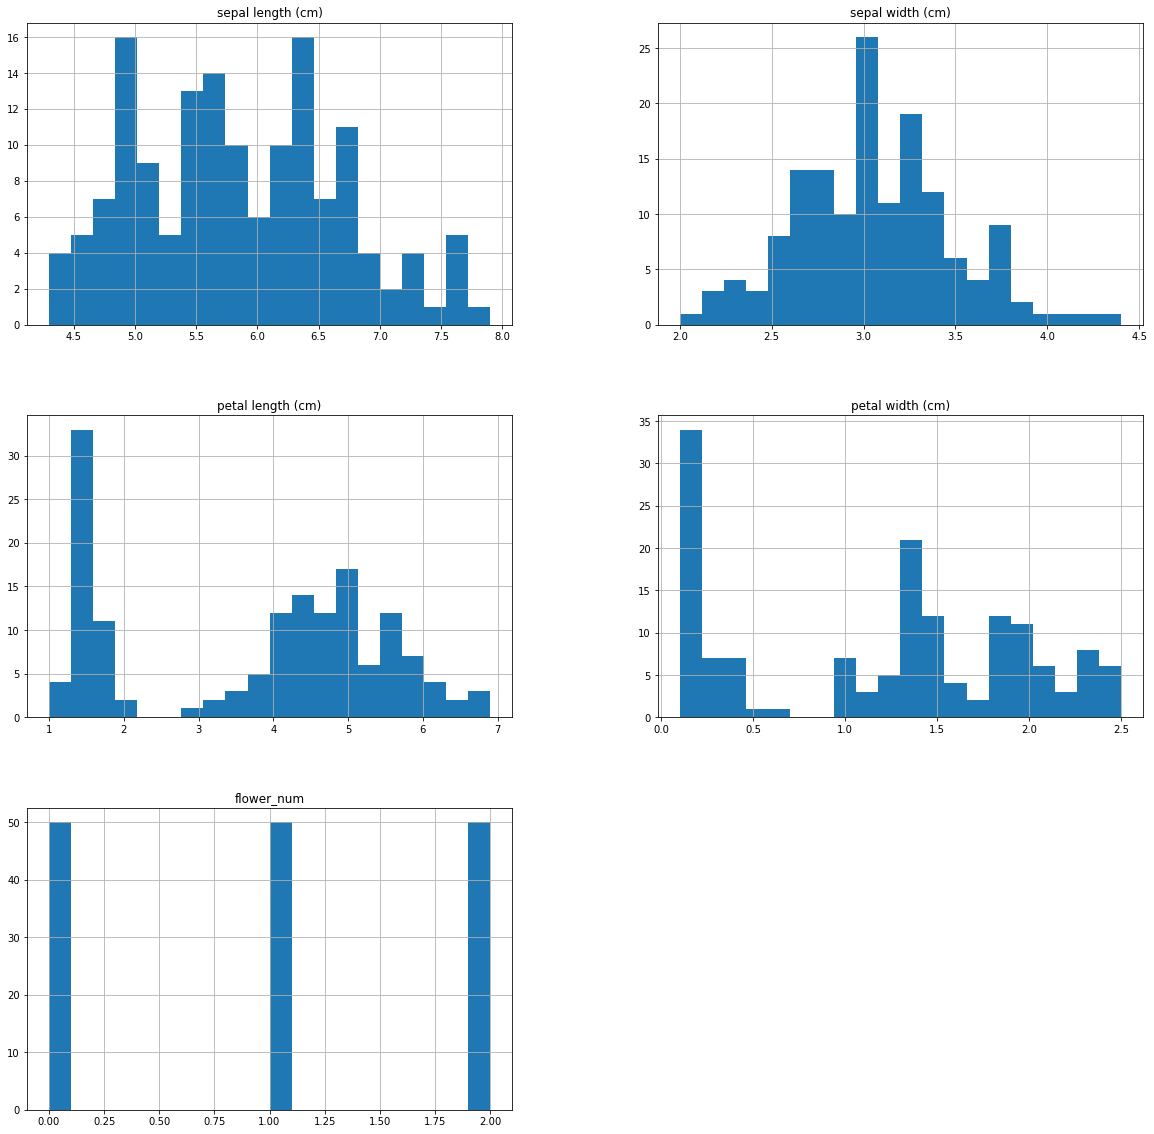

In [12]:
import matplotlib.pyplot as plt

df.hist(figsize=(20,20), bins=20)
plt.show()

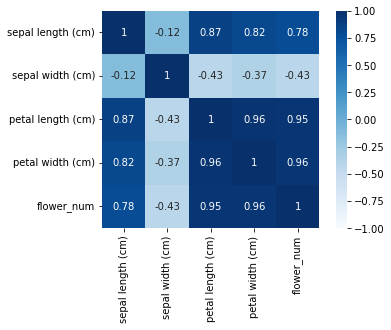

In [18]:
corr = df.corr("pearson")

import seaborn as sns

sns.heatmap(data=corr, cmap='Blues', center=0, cbar=True, vmin=-1, vmax=1, square=True, annot = True)
plt.show()

In [19]:
df.describe(include="object")

,flower_cat
count,150
unique,3
top,setosa
freq,50


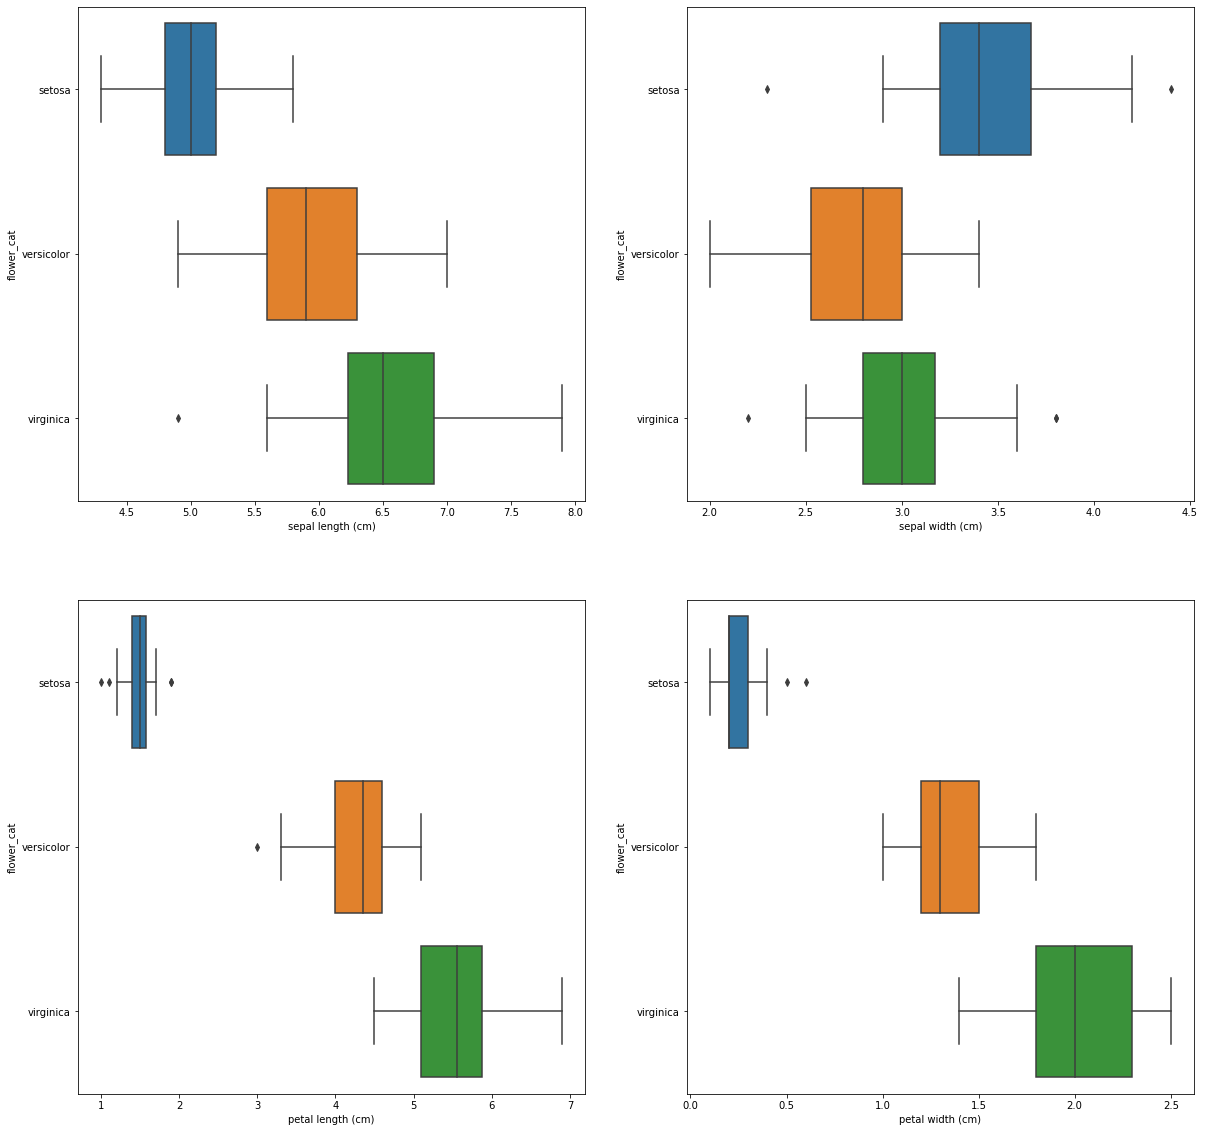

In [21]:
num_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']

fig, ax =plt.subplots(2,2, figsize=(20,20))

k = 0
for i in range(2):
    for j in range(2):        
        bp = sns.boxplot(y = df['flower_cat'], x = num_cols[k], data=df, ax=ax[i][j])
        #bp.set_xscale("log")
        k = k + 1

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(["flower_num","flower_cat"], axis = 1)
y = df["flower_num"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Models to implement 

- SVC
- Logistic Regression
- Random Forest Classifier
- KNN
- NN

### Just for understand how GridSearchCV works

In [4]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

model = SVC(kernel = "rbf", C=30, gamma = "auto")
# It trains the model and returns the score in the validation set
cross_val_score(model, X_train, y_train, cv=5)

# We can tune the hyper parameters using cross_val_score
# This method can be used to find the best hyper-parameters
# After that, the final model will be trained (using the best hyper-params)
kernels = ["rbf", "linear"]
C = [1,10,20,50]
avg_scores = {}

# Manual implementation of GridSearchCV
for kval in kernels:
    for cval in C:
        model = SVC(kernel=kval, C=cval, gamma="auto")
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
        print(cv_scores)
        avg_scores[kval  + "_" + str(cval)] = np.average(cv_scores)

[0.95238095 0.95238095 1.         1.         0.9047619 ]
[0.95238095 1.         1.         1.         0.9047619 ]
[0.95238095 1.         1.         1.         0.9047619 ]
[0.95238095 1.         0.95238095 1.         0.9047619 ]
[0.95238095 0.95238095 1.         1.         0.95238095]
[0.95238095 1.         1.         0.95238095 0.9047619 ]
[0.95238095 0.95238095 0.95238095 0.95238095 0.9047619 ]
[0.95238095 0.9047619  0.95238095 0.95238095 0.9047619 ]


In [6]:
avg_scores

{'rbf_1': 0.980952380952381,
 'rbf_10': 0.9619047619047618,
 'rbf_20': 0.9523809523809523,
 'rbf_50': 0.9428571428571428,
 'linear_1': 0.980952380952381,
 'linear_10': 0.9619047619047618,
 'linear_20': 0.9523809523809523,
 'linear_50': 0.9714285714285713}

### Method 1: Tuning hyper-parameters 

In [6]:
from sklearn.model_selection import GridSearchCV

model = SVC()

reg=list(np.linspace(1,100,5))
kernel = ["rbf", "sigmoid"]
gamma=["scale","auto"]
param_dict = dict(C=reg, kernel=kernel,gamma=gamma)

clf = GridSearchCV(model, param_dict , cv=5, return_train_score=True)

clf.fit(X,y)
clf.cv_results_

# dir(clf) 
# clf.best_params_

{'mean_fit_time': array([0.00132418, 0.00196314, 0.00139527, 0.00159407, 0.00099716,
        0.00159698, 0.00099664, 0.00179543, 0.00099626, 0.00179482,
        0.00099773, 0.00179362, 0.00099659, 0.00179381, 0.00090637,
        0.00179543, 0.00089121, 0.00182571, 0.00099645, 0.00159616]),
 'std_fit_time': array([4.12607278e-04, 5.13901278e-05, 4.86827629e-04, 4.87452158e-04,
        1.63521082e-06, 4.84957770e-04, 3.16297988e-07, 7.46200313e-04,
        5.56082906e-07, 3.99115493e-04, 2.08612851e-06, 3.98637091e-04,
        6.55716113e-06, 3.98731317e-04, 1.79964092e-04, 3.99337401e-04,
        2.11000577e-04, 4.19071955e-04, 1.16800773e-07, 4.86926284e-04]),
 'mean_score_time': array([0.00079861, 0.00064802, 0.00079889, 0.0007988 , 0.00079942,
        0.00079613, 0.00059929, 0.00091314, 0.00079737, 0.00079646,
        0.00059786, 0.00079727, 0.00059762, 0.00079608, 0.00079708,
        0.00059981, 0.00059752, 0.00076609, 0.00079718, 0.00079675]),
 'std_score_time': array([0.00025393, 

In [9]:
df = pd.DataFrame(clf.cv_results_)

COLUMNS = df.shape[1]
pd.set_option('display.max_columns', COLUMNS)

df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [10]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001324,0.000413,0.000799,0.000254,1.0,scale,rbf,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}",0.966667,0.966667,0.966667,0.933333,1.000000,0.966667,0.021082,7,0.983333,0.958333,0.983333,0.983333,0.958333,0.973333,0.012247
1,0.001963,0.000051,0.000648,0.000440,1.0,scale,sigmoid,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}",0.033333,0.166667,0.000000,0.100000,0.033333,0.066667,0.059628,16,0.041667,0.066667,0.091667,0.066667,0.083333,0.070000,0.017159
2,0.001395,0.000487,0.000799,0.000399,1.0,auto,rbf,"{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.000000,0.980000,0.016330,1,0.983333,0.983333,0.991667,0.983333,0.975000,0.983333,0.005270
3,0.001594,0.000487,0.000799,0.000399,1.0,auto,sigmoid,"{'C': 1.0, 'gamma': 'auto', 'kernel': 'sigmoid'}",0.333333,0.100000,0.000000,0.033333,0.000000,0.093333,0.125433,11,0.333333,0.016667,0.050000,0.041667,0.050000,0.098333,0.118134
4,0.000997,0.000002,0.000799,0.000400,25.75,scale,rbf,"{'C': 25.75, 'gamma': 'scale', 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.000000,0.980000,0.016330,1,0.975000,0.975000,0.991667,0.991667,0.966667,0.980000,0.010000


In [12]:
df = df[["params","mean_train_score","mean_test_score"]]
df = df.sort_values(by = ["mean_test_score","mean_train_score"], ascending = False)
df.head()

,params,mean_train_score,mean_test_score
2,"{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}",0.983333,0.980000
4,"{'C': 25.75, 'gamma': 'scale', 'kernel': 'rbf'}",0.980000,0.980000
12,"{'C': 75.25, 'gamma': 'scale', 'kernel': 'rbf'}",0.980000,0.973333
16,"{'C': 100.0, 'gamma': 'scale', 'kernel': 'rbf'}",0.980000,0.973333
8,"{'C': 50.5, 'gamma': 'scale', 'kernel': 'rbf'}",0.976667,0.973333


### Method 2: Tuning hyper-parameters 

In [90]:
from sklearn.model_selection import RandomizedSearchCV

C=list(np.linspace(1,1000,1000))
kernel = ["linear", "poly", "rbf", "sigmoid"]
gamma=["scale","auto"]
param_dict = dict(C=C, kernel=kernel,gamma=gamma)

cl = svm.SVC()
rs = RandomizedSearchCV(estimator = cl, param_distributions = param_dict, cv=5, return_train_score=False, n_iter=2000)

rs.fit(X,y)

df = pd.DataFrame(rs.cv_results_)
df = df[["param_C","param_kernel","param_gamma","mean_test_score"]]
df = df.sort_values(by=["mean_test_score"],axis=0,ascending=False)
df.head()

,param_C,param_kernel,param_gamma,mean_test_score
1442,10.0,rbf,auto,0.98
1218,2.0,linear,auto,0.98
1616,10.0,rbf,scale,0.98
1522,1.0,linear,auto,0.98
1088,5.0,linear,scale,0.98


In [91]:
rs.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'C': 12.0}

In [85]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    "svm" : {
        "model" : svm.SVC(),
        "params" : {
            "C"         :list(np.linspace(1,10,10)),
            "kernel"    : ["linear", "poly", "rbf", "sigmoid"],
            "gamma"     :["scale","auto"]
        }
    },
    "random_forest":{
        "model": RandomForestClassifier(),
        "params" : {
            "n_estimators" : [1,5,10]
        }
    },
    "logistic_regression" : {
        "model" : LogisticRegression(solver="liblinear", multi_class="auto"),
        "params" : {
            "C" : [1,5,10]
        }
    }
}

In [86]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"], mp["params"], cv=5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        "best_score" :clf.best_score_,
        "best_params": clf.best_params_
    })

In [87]:
df = pd.DataFrame(scores, columns = ["model", "best_score", "best_params"])

In [88]:
df

,model,best_score,best_params
0,svm,0.986667,"{'C': 4.0, 'gamma': 'auto', 'kernel': 'rbf'}"
1,random_forest,0.953333,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}
